<a href="https://colab.research.google.com/github/Zeusfire2058/code_stuff_woo/blob/master/plotting%20versus%20time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install deepxde

Compiling model...
Building feed-forward neural network...
'build' took 0.172894 s

'compile' took 10.926318 s

Training model...

Step      Train loss                                                                                                                                                                                                                                                                                                                          Test loss                                                                                                                                                                                                                                                                                                                           Test metric
0         [8.99e-02, 3.65e-02, 6.81e-03, 3.01e-02, 8.01e-01, 3.15e-01, 4.11e-02, 2.85e-02, 2.72e+01, 2.89e-02, 1.09e-01, 2.45e-02, 8.09e-02, 1.99e-02, 1.45e-01, 4.41e-02, 4.55e-03, 8.63e-03, 7.98e-04

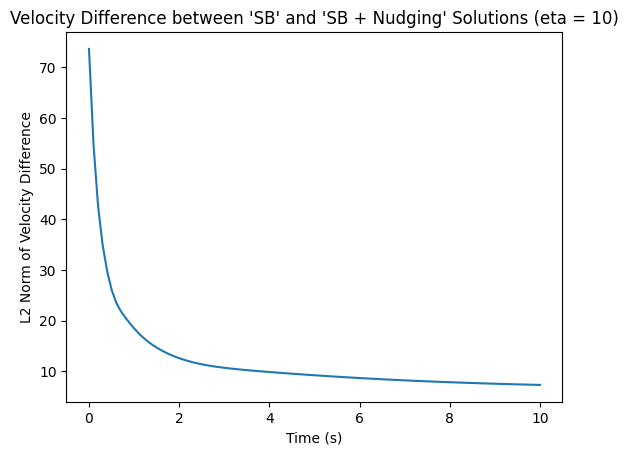

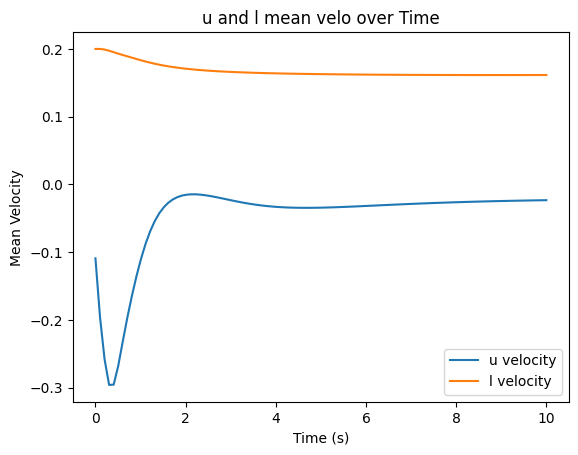

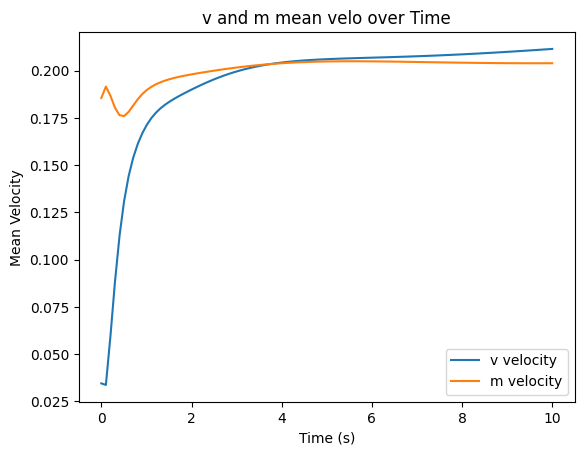

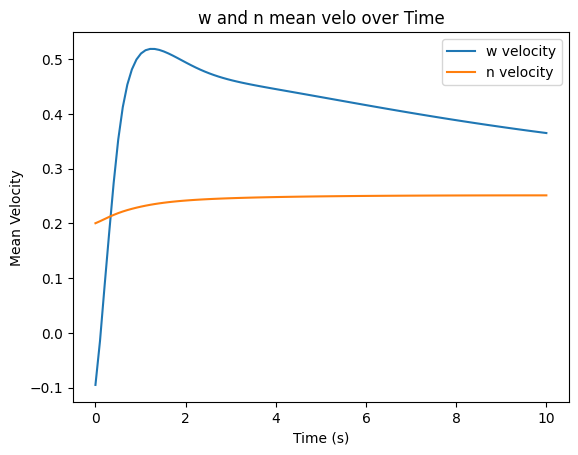

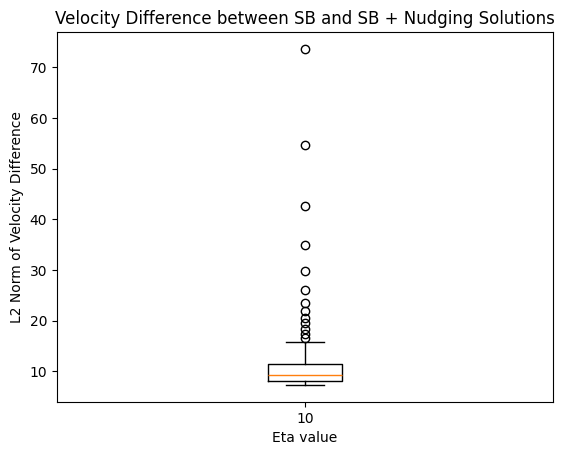

In [4]:
from functools import partial
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# -----------------------------------
# These are the values you need to change
# -----------------------------------
alpha = 0.5
#eta= 0.1
rho = 1.0
mu = 1.0
# -----------------------------------
eta_diffarray = []
eta_array = []
for eta in [10,]:
    '''
    # Navier Stokes PDE
    def ns_pde(x, u):
        u_vel, v_vel, w_vel, p = u[:, 0:1], u[:, 1:2], u[:, 2:3], u[:, 3:4]

        f_x, f_y, f_z = 0.0, 0.0, 0.0

        # First Derivatives

    # Jacobian takes:
      # y: output tensor [u, v, w, u_bar, v_bar, w_bar, q]
      # x: input tensor [x, y, z, t]
      # i: index of y to use (y[i])
      # j: index of x to use (x[j])
    # and returns:
      # (∂y[i]) / (∂x[j])

        u_vel_t = dde.grad.jacobian(u, x, i=0, j=3)  # du/dt
        u_vel_x = dde.grad.jacobian(u, x, i=0, j=0)  # du/dx
        u_vel_y = dde.grad.jacobian(u, x, i=0, j=1)  # du/dy
        u_vel_z = dde.grad.jacobian(u, x, i=0, j=2)  # du/dz

        v_vel_t = dde.grad.jacobian(u, x, i=1, j=3)  # dv/dt
        v_vel_x = dde.grad.jacobian(u, x, i=1, j=0)  # dv/dx
        v_vel_y = dde.grad.jacobian(u, x, i=1, j=1)  # dv/dy
        v_vel_z = dde.grad.jacobian(u, x, i=1, j=2)  # dv/dz

        w_vel_t = dde.grad.jacobian(u, x, i=2, j=3)  # dw/dt
        w_vel_x = dde.grad.jacobian(u, x, i=2, j=0)  # dw/dx
        w_vel_y = dde.grad.jacobian(u, x, i=2, j=1)  # dw/dy
        w_vel_z = dde.grad.jacobian(u, x, i=2, j=2)  # dw/dz

        p_x = dde.grad.jacobian(u, x, i=3, j=0)  # dp/dx
        p_y = dde.grad.jacobian(u, x, i=3, j=1)  # dp/dy
        p_z = dde.grad.jacobian(u, x, i=3, j=2)  # dp/dz

        # Second Derivatives
        u_vel_xx = dde.grad.hessian(u, x, component=0, i=0, j=0)  # d²u/dx²
        u_vel_yy = dde.grad.hessian(u, x, component=0, i=1, j=1)  # d²u/dy²
        u_vel_zz = dde.grad.hessian(u, x, component=0, i=2, j=2)  # d²u/dz²

        v_vel_xx = dde.grad.hessian(u, x, component=1, i=0, j=0)  # d²v/dx²
        v_vel_yy = dde.grad.hessian(u, x, component=1, i=1, j=1)  # d²v/dy²
        v_vel_zz = dde.grad.hessian(u, x, component=1, i=2, j=2)  # d²v/dz²

        w_vel_xx = dde.grad.hessian(u, x, component=2, i=0, j=0)  # d²w/dx²
        w_vel_yy = dde.grad.hessian(u, x, component=2, i=1, j=1)  # d²w/dy²
        w_vel_zz = dde.grad.hessian(u, x, component=2, i=2, j=2)  # d²w/dz²

            # NS-x
        momentum_x = (
            rho * (u_vel_t + u_vel * u_vel_x + v_vel * u_vel_y + w_vel * u_vel_z)
            - rho * f_x + p_x
            - mu * (u_vel_xx + u_vel_yy + u_vel_zz)
        )

        # NS-y
        momentum_y = (
            rho * (v_vel_t + u_vel * v_vel_x + v_vel * v_vel_y + w_vel * v_vel_z)
            - rho * f_y + p_y
            - mu * (v_vel_xx + v_vel_yy + v_vel_zz)
        )

        # NS-z
        momentum_z = (
            rho * (w_vel_t + u_vel * w_vel_x + v_vel * w_vel_y + w_vel * w_vel_z)
            - rho * f_z + p_z
            - mu * (w_vel_xx + w_vel_yy + w_vel_zz)
        )

        # continuity
        continuity = u_vel_x + v_vel_y + w_vel_z

        return [momentum_x, momentum_y, momentum_z, continuity]
     '''
    #Simplified Bardina
    def sb_alpha_pde(x, y):
        f_x = 0
        f_y = 0
        f_z = 0
        f_x_bar = 0
        f_y_bar = 0
        f_z_bar = 0

        u, v, w, u_bar, v_bar, w_bar, q, l, m, n, l_bar, m_bar, n_bar, q_bar = (y[:, 0:1], y[:, 1:2], y[:, 2:3], y[:, 3:4], y[:, 4:5], y[:, 5:6],
            y[:, 6:7], y[:, 7:8], y[:, 8:9], y[:, 9:10], y[:, 10:11], y[:, 11:12], y[:, 12:13], y[:, 13:14])


        # First-order derivatives for SB
        du_t = dde.grad.jacobian(y, x, i=0, j=3)  # ∂u/∂t
        du_x = dde.grad.jacobian(y, x, i=0, j=0)  # ∂u/∂x
        du_y = dde.grad.jacobian(y, x, i=0, j=1)  # ∂u/∂y
        du_z = dde.grad.jacobian(y, x, i=0, j=2)  # ∂u/∂z

        dv_t = dde.grad.jacobian(y, x, i=1, j=3)  # ∂v/∂t
        dv_x = dde.grad.jacobian(y, x, i=1, j=0)  # ∂v/∂x
        dv_y = dde.grad.jacobian(y, x, i=1, j=1)  # ∂v/∂y
        dv_z = dde.grad.jacobian(y, x, i=1, j=2)  # ∂v/∂z

        dw_t = dde.grad.jacobian(y, x, i=2, j=3)  # ∂w/∂t
        dw_x = dde.grad.jacobian(y, x, i=2, j=0)  # ∂w/∂x
        dw_y = dde.grad.jacobian(y, x, i=2, j=1)  # ∂w/∂y
        dw_z = dde.grad.jacobian(y, x, i=2, j=2)  # ∂w/∂z


        du_bar_t = dde.grad.jacobian(y, x, i=3, j=3)  # ∂u_bar/∂t
        du_bar_x = dde.grad.jacobian(y, x, i=3, j=0)  # ∂u_bar/∂x
        du_bar_y = dde.grad.jacobian(y, x, i=3, j=1)  # ∂u_bar/∂y
        du_bar_z = dde.grad.jacobian(y, x, i=3, j=2)  # ∂u_bar/∂z

        dv_bar_t = dde.grad.jacobian(y, x, i=4, j=3)  # ∂v_bar/∂t
        dv_bar_x = dde.grad.jacobian(y, x, i=4, j=0)  # ∂v_bar/∂x
        dv_bar_y = dde.grad.jacobian(y, x, i=4, j=1)  # ∂dv_bar/∂y
        dv_bar_z = dde.grad.jacobian(y, x, i=4, j=2)  # ∂dv_bar/∂z

        dw_bar_t = dde.grad.jacobian(y, x, i=5, j=3)  # ∂w_bar/∂t
        dw_bar_x = dde.grad.jacobian(y, x, i=5, j=0)  # ∂dw_bar/∂x
        dw_bar_y = dde.grad.jacobian(y, x, i=5, j=1)  # ∂dw_bar/∂y
        dw_bar_z = dde.grad.jacobian(y, x, i=5, j=2)  # ∂dw_bar/∂z

        dq_x = dde.grad.jacobian(y, x, i=6, j=0)  # ∂q/∂x
        dq_y = dde.grad.jacobian(y, x, i=6, j=1)  # ∂q/∂y
        dq_z = dde.grad.jacobian(y, x, i=6, j=2)  # ∂q/∂z

        # Second-order derivatives
      # Hessian takes:
        # y: output tensor [u, v, w, u_bar, v_bar, w_bar, q]
        # x: input tensor [x, y, z, t]
        # component: index of y[] to differentiate (y[component])
        # i: index of x to differentiate w.r.t 1st (x[i])
        # j: index of x to differentiate w.r.t 2nd (x[j])
      # and returns:
        # (∂^2 y[component]) / (∂x[i] ∂x[j])

        du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
        du_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
        du_zz = dde.grad.hessian(y, x, component=0, i=2, j=2)

        dv_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
        dv_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
        dv_zz = dde.grad.hessian(y, x, component=1, i=2, j=2)

        dw_xx = dde.grad.hessian(y, x, component=2, i=0, j=0)
        dw_yy = dde.grad.hessian(y, x, component=2, i=1, j=1)
        dw_zz = dde.grad.hessian(y, x, component=2, i=2, j=2)

        du_bar_xx = dde.grad.hessian(y, x, component=3, i=0, j=0)
        du_bar_yy = dde.grad.hessian(y, x, component=3, i=1, j=1)
        du_bar_zz = dde.grad.hessian(y, x, component=3, i=2, j=2)

        dv_bar_xx = dde.grad.hessian(y, x, component=4, i=0, j=0)
        dv_bar_yy = dde.grad.hessian(y, x, component=4, i=1, j=1)
        dv_bar_zz = dde.grad.hessian(y, x, component=4, i=2, j=2)

        dw_bar_xx = dde.grad.hessian(y, x, component=5, i=0, j=0)
        dw_bar_yy = dde.grad.hessian(y, x, component=5, i=1, j=1)
        dw_bar_zz = dde.grad.hessian(y, x, component=5, i=2, j=2)

        # Laplacians
        laplacian_u = du_xx + du_yy + du_zz
        laplacian_v = dv_xx + dv_yy + dv_zz
        laplacian_w = dw_xx + dw_yy + dw_zz

        laplacian_u_bar = du_bar_xx + du_bar_yy + du_bar_zz
        laplacian_v_bar = dv_bar_xx + dv_bar_yy + dv_bar_zz
        laplacian_w_bar = dw_bar_xx + dw_bar_yy + dw_bar_zz

        # Relationship between filtered and actual velocities
        relation_u = u - alpha**2 * laplacian_u - u_bar
        relation_v = v - alpha**2 * laplacian_v - v_bar
        relation_w = w - alpha**2 * laplacian_w - w_bar
        #u = unfiltered
        #v = filtered
################################################################
        # First-order derivatives for SB_nudge
        dl_t = dde.grad.jacobian(y, x, i=7, j=3)  # ∂i/∂t
        dl_x = dde.grad.jacobian(y, x, i=7, j=0)  # ∂i/∂x
        dl_y = dde.grad.jacobian(y, x, i=7, j=1)  # ∂i/∂y
        dl_z = dde.grad.jacobian(y, x, i=7, j=2)  # ∂i/∂z

        dm_t = dde.grad.jacobian(y, x, i=8, j=3)  # ∂j/∂t
        dm_x = dde.grad.jacobian(y, x, i=8, j=0)  # ∂j/∂x
        dm_y = dde.grad.jacobian(y, x, i=8, j=1)  # ∂j/∂y
        dm_z = dde.grad.jacobian(y, x, i=8, j=2)  # ∂j/∂z

        dn_t = dde.grad.jacobian(y, x, i=9, j=3)  # ∂k/∂t
        dn_x = dde.grad.jacobian(y, x, i=9, j=0)  # ∂k/∂x
        dn_y = dde.grad.jacobian(y, x, i=9, j=1)  # ∂k/∂y
        dn_z = dde.grad.jacobian(y, x, i=9, j=2)  # ∂k/∂z


        dl_bar_t = dde.grad.jacobian(y, x, i=10, j=3)  # ∂l_bar/∂t
        dl_bar_x = dde.grad.jacobian(y, x, i=10, j=0)  # ∂l_bar/∂x
        dl_bar_y = dde.grad.jacobian(y, x, i=10, j=1)  # ∂l_bar/∂y
        dl_bar_z = dde.grad.jacobian(y, x, i=10, j=2)  # ∂l_bar/∂z

        dm_bar_t = dde.grad.jacobian(y, x, i=11, j=3)  # ∂m_bar/∂t
        dm_bar_x = dde.grad.jacobian(y, x, i=11, j=0)  # ∂m_bar/∂x
        dm_bar_y = dde.grad.jacobian(y, x, i=11, j=1)  # ∂m_bar/∂y
        dm_bar_z = dde.grad.jacobian(y, x, i=11, j=2)  # ∂m_bar/∂z

        dn_bar_t = dde.grad.jacobian(y, x, i=12, j=3)  # ∂n_bar/∂t
        dn_bar_x = dde.grad.jacobian(y, x, i=12, j=0)  # ∂n_bar/∂x
        dn_bar_y = dde.grad.jacobian(y, x, i=12, j=1)  # ∂n_bar/∂y
        dn_bar_z = dde.grad.jacobian(y, x, i=12, j=2)  # ∂n_bar/∂z

        dq_bar_x = dde.grad.jacobian(y, x, i=13, j=0)  # ∂q_bar/∂x
        dq_bar_y = dde.grad.jacobian(y, x, i=13, j=1)  # ∂q_bar/∂y
        dq_bar_z = dde.grad.jacobian(y, x, i=13, j=2)  # ∂q_bar/∂z

        # Second-order derivatives

        dl_xx = dde.grad.hessian(y, x, component=7, i=0, j=0)
        dl_yy = dde.grad.hessian(y, x, component=7, i=1, j=1)
        dl_zz = dde.grad.hessian(y, x, component=7, i=2, j=2)

        dm_xx = dde.grad.hessian(y, x, component=8, i=0, j=0)
        dm_yy = dde.grad.hessian(y, x, component=8, i=1, j=1)
        dm_zz = dde.grad.hessian(y, x, component=8, i=2, j=2)

        dn_xx = dde.grad.hessian(y, x, component=9, i=0, j=0)
        dn_yy = dde.grad.hessian(y, x, component=9, i=1, j=1)
        dn_zz = dde.grad.hessian(y, x, component=9, i=2, j=2)

        dl_bar_xx = dde.grad.hessian(y, x, component=10, i=0, j=0)
        dl_bar_yy = dde.grad.hessian(y, x, component=10, i=1, j=1)
        dl_bar_zz = dde.grad.hessian(y, x, component=10, i=2, j=2)

        dm_bar_xx = dde.grad.hessian(y, x, component=11, i=0, j=0)
        dm_bar_yy = dde.grad.hessian(y, x, component=11, i=1, j=1)
        dm_bar_zz = dde.grad.hessian(y, x, component=11, i=2, j=2)

        dn_bar_xx = dde.grad.hessian(y, x, component=12, i=0, j=0)
        dn_bar_yy = dde.grad.hessian(y, x, component=12, i=1, j=1)
        dn_bar_zz = dde.grad.hessian(y, x, component=12, i=2, j=2)

        # Laplacians
        laplacian_l = dl_xx + dl_yy + dl_zz
        laplacian_m = dm_xx + dm_yy + dm_zz
        laplacian_n = dn_xx + dn_yy + dn_zz

        laplacian_l_bar = dl_bar_xx + dl_bar_yy + dl_bar_zz
        laplacian_m_bar = dm_bar_xx + dm_bar_yy + dm_bar_zz
        laplacian_n_bar = dn_bar_xx + dn_bar_yy + dn_bar_zz

        # Relationship between filtered and actual velocities
        relation_l = l - alpha**2 * laplacian_l - l_bar
        relation_m = m - alpha**2 * laplacian_m - m_bar
        relation_n = n - alpha**2 * laplacian_n - n_bar

        ###############################################################
        # Momentum equations
        f1 = (
            du_bar_t                                                    # ∂v/∂t (filtered velocity)
            + (u * du_x + v * du_y + w * du_z)                          # x-component of (u · ∇)u
            + dq_x                                                      # pressure gradient (∂p/∂x)
            - mu * laplacian_u_bar                                      # viscosity term on u: -mu Δv
            - f_x                                                       # external force in x-direction
        )
        f2 = (
            dv_bar_t
            + (u * dv_x + v * dv_y + w * dv_z)
            + dq_y
            - mu * laplacian_v_bar
            - f_y
        )
        f3 = (
            dw_bar_t
            + (u * dw_x + v * dw_y + w * dw_z)
            + dq_z
            - mu * laplacian_w_bar
            - f_z
        )
        f4 = (
            dl_bar_t                                                    # ∂i/∂t (filtered velocity)
            + (l * dl_x + m * dl_y + n * dl_z)                          # x-component of (i · ∇)i
            + dq_bar_x                                                  # pressure gradient (∂p_bar/∂x)
            - mu * laplacian_l_bar                                      # viscosity term on u: -mu Δl_bar
            - f_x_bar                                                   # external force in x-direction
                                                         # nudging parameter
        )
        f5 = (
            dm_bar_t
            + (l * dm_x + m * dm_y + n * dm_z)
            + dq_bar_y
            - mu * laplacian_m_bar
            - f_y_bar
            - eta * (m - v)
        )
        f6 = (
            dn_bar_t
            + (l * dn_x + m * dn_y + n * dn_z)
            + dq_bar_z
            - mu * laplacian_n_bar
            - f_z_bar
        )

        # Incompressibility condition for bar velocities
        incompressibility = du_x + dv_y + dw_z
        incompressibility_bar = dl_x + dm_y + dn_z


        # These are equal to zero
        return [f1, f2, f3, incompressibility, relation_u, relation_v, relation_w,
                f4, f5, f6, incompressibility_bar, relation_l, relation_m, relation_n]

###########################################################################
         # Define initial condition function

         #use if want a specific point in time
         #specific_point = np.array([[0.0, 0.0, 0.0, 0.0]]) # [x, y, z, t=0]


        # Find the index where the input x matches the specific point
        # We use isclose for floating point comparisons
        # Check if the spatial coordinates and time match the specific point
        '''
        #used if specific point in time
        is_at_specific_point = np.all(np.isclose(x, specific_point), axis=1)

        # Set initial values only for the point that matches
        if np.any(is_at_specific_point):
        '''

        # Define the initial values for each component at t=0

    def ic_1(x):
        # Return initial values for component 1 (u) at t=0
        num_points = x.shape[0] #gets the number of points in the input x array
        initial_u = np.random.randn(num_points, 1) # makes an array that matches the # of points and fills them with the specified number
        return initial_u

    def ic_2(x):
        # Return initial values for component 2 (v) at t=0
        num_points = x.shape[0]
        initial_v = np.random.randn(num_points, 1) # Return shape (num_points, 1)
        return initial_v

    def ic_3(x):
        # Return initial values for component 3 (w) at t=0
        num_points = x.shape[0]
        initial_w = np.random.randn(num_points, 1) # Return shape (num_points, 1)
        return initial_w


    def ic_7(x):
        # Return initial values for component 7 (i) at t=0
        num_points = x.shape[0]
        initial_l = np.full((num_points, 1), 0.2) # Return shape (num_points, 1)
        return initial_l

    def ic_8(x):
        # Return initial values for component 8 (j) at t=0
        num_points = x.shape[0]
        initial_m = np.full((num_points, 1), 0.2) # Return shape (num_points, 1)
        return initial_m

    def ic_9(x):
        # Return initial values for component 9 (k) at t=0
        num_points = x.shape[0]
        initial_n = np.full((num_points, 1), 0.2) # Return shape (num_points, 1)
        return initial_n


        ###########################################################
    # Create grid
    #going from -1 to 1 split into 10 intervals
    x, y, z = np.meshgrid(
        np.linspace(-1, 1, 10),
        np.linspace(-1, 1, 10),
        np.linspace(-1, 1, 10)
    )
    X = np.vstack((np.ravel(x), np.ravel(y), np.ravel(z))).T #makes 3D grid into a 2D array and each row is a point in 3D space
    t_0 = np.zeros((X.shape[0], 1))  # Initial time = 0


    # Geometry and time domain
    geom = dde.geometry.Cuboid([-1, -1, -1], [1, 1, 1])  # 3D spatial domain
    timedomain = dde.geometry.TimeDomain(0, 10)           # Time domain
    geomtime = dde.geometry.GeometryXTime(geom, timedomain)  # Combine spatial and temporal domains


    # Define periodic boundary conditions
    def periodic_bc(x, on_boundary):
        x_spatial = x[:3]  # Just x, y, z (exclude time)
        return on_boundary and (
            np.isclose(x_spatial[0], -1) or np.isclose(x_spatial[0], 1) or
            np.isclose(x_spatial[1], -1) or np.isclose(x_spatial[1], 1) or
            np.isclose(x_spatial[2], -1) or np.isclose(x_spatial[2], 1)
        )

    # Create periodic boundary conditions for velocity components
    bc_u = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=0)  # u on x
    bc_v = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=1)  # v on y
    bc_w = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=2)  # w on z

    # Create periodic boundary conditions for filtered velocity components
    bc_u_bar = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=3)  # u_bar on x
    bc_v_bar = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=4)  # v_bar on y
    bc_w_bar = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=5)  # w_bar on z

     # Create periodic boundary conditions for velocity components
    bc_l = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=7)  # l on x
    bc_m = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=8)  # m on y
    bc_n = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=9)  # n on z

    # Create periodic boundary conditions for filtered velocity components
    bc_l_bar = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=10)  # l_bar on x
    bc_m_bar = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=11)  # m_bar on y
    bc_n_bar = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=12)  # n_bar on z

    # Create initial condition

    ic_u = dde.icbc.IC(geomtime, ic_1, lambda _, on_initial: on_initial, component = 0) # Apply initial condition to u component
    ic_v = dde.icbc.IC(geomtime, ic_2, lambda _, on_initial: on_initial, component = 1)
    ic_w = dde.icbc.IC(geomtime, ic_3, lambda _, on_initial: on_initial, component = 2)

    ic_l = dde.icbc.IC(geomtime, ic_7, lambda _, on_initial: on_initial, component = 7) # Apply the initial condition only to component 7 (nudge values)
    ic_m = dde.icbc.IC(geomtime, ic_8, lambda _, on_initial: on_initial, component = 8) # Apply the initial condition only to component 8
    ic_n = dde.icbc.IC(geomtime, ic_9, lambda _, on_initial: on_initial, component = 9) # Apply the initial condition only to component 9
    '''
    # Define Navier-Stokes model
    data_ns = dde.data.TimePDE(
        geomtime, ns_pde,
        [bc_u, bc_v, bc_w],
        num_domain=500, num_boundary=50
    )
    net_ns = dde.nn.FNN([4] + [50] * 3 + [4], "tanh", "Glorot normal") #tanh is activation function, Glorot is for weights
    model_ns = dde.Model(data_ns, net_ns)
    model_ns.compile("adam", lr=1e-3) #adam optimizer and 1E-3 learning rate
    losshistory_ns, train_state_ns = model_ns.train(iterations=10000)
    '''
    # Define SB model
    data_sb = dde.data.TimePDE(
        geomtime, sb_alpha_pde,
        [bc_u, bc_v, bc_w, bc_u_bar, bc_v_bar, bc_w_bar,
         bc_l, bc_m, bc_n, bc_l_bar, bc_m_bar, bc_n_bar,
          ic_u, ic_v, ic_w, ic_l, ic_m, ic_n],  # Corrected boundary conditions

        num_domain=500,   # sample  random points in our domain and train on them (500 unique [x, y, z, t] EACH EPOCH)
        num_boundary=50,   # sample an additional  random points ON our domain BOUNDARY (50 unique [x, y, z, t] EACH EPOCH)
        num_initial=50    # sample random points at the initial time (t=0)
      )
    net_sb = dde.nn.FNN([4] + [50] * 3 + [14], "tanh", "Glorot normal")  # Input: 4 (x, y, z, t); Output: 14
    #net_sb is aprroximating the answer to the PDE
    model_sb = dde.Model(data_sb, net_sb)
    model_sb.compile("adam", lr=1e-3)
    losshistory_sb, train_state_sb = model_sb.train(iterations=10000)

    '''
    # Solve Navier-Stokes model
    output_ns = model_ns.predict(np.hstack((X, t_0))) #predicting the original points at t = 0
    u_ns, v_ns, w_ns = output_ns[:, 0], output_ns[:, 1], output_ns[:, 2]
    '''
    # Solve SB model
    output_sb = model_sb.predict(np.hstack((X, t_0)))
    u_sb, v_sb, w_sb, l_sb, m_sb, n_sb = output_sb[:, 0], output_sb[:, 1], output_sb[:, 2], output_sb[:, 7], output_sb[:, 8], output_sb[:, 9]

    # Compute velocity differences
    u_diff = l_sb - u_sb
    v_diff = m_sb - v_sb
    w_diff = n_sb - w_sb

    # Function to compute L2 norm
    def compute_l2_norm(u_diff, v_diff, w_diff):
        return np.sqrt(np.sum(u_diff**2 + v_diff**2 + w_diff**2))

    # Compare results over time
    plotarr = []
    diffarray = []
    u_array = []
    v_array = []
    w_array = []
    l_array = []
    m_array = []
    n_array = []


    for t in np.linspace(0, 10, 100):  # Multiple time steps
        t_val = np.ones((X.shape[0], 1)) * t
        output_sb = model_sb.predict(np.hstack((X, t_val))) #predicting points at certain times

        u_sb, v_sb, w_sb = output_sb[:, 0], output_sb[:, 1], output_sb[:, 2]
        l_sb, m_sb, n_sb = output_sb[:, 7], output_sb[:, 8], output_sb[:, 9]

        # Compute velocity differences at each time step
        u_diff = l_sb - u_sb
        v_diff = m_sb - v_sb
        w_diff = n_sb - w_sb

        # Calculate L2 norm
        l2_norm = compute_l2_norm(u_diff, v_diff, w_diff)
        plotarr.append(t)
        diffarray.append(l2_norm)

        # Calculate and store the mean of u_sb and l_sb at each time step
        u_array.append(np.mean(u_sb))
        v_array.append(np.mean(v_sb))
        w_array.append(np.mean(w_sb))
        l_array.append(np.mean(l_sb))
        m_array.append(np.mean(m_sb))
        n_array.append(np.mean(n_sb))



    '''
    # Compute reference L2 norm for NS velocity at each time step
    l2_ns_array = [np.sqrt(np.sum(output_sb[:, 0]**2 + output_sb[:, 1]**2 + output_sb[:, 2]**2))
                   for t in np.linspace(0, 10, 50)]
    '''


    # Plot the L2 norm of velocity differences over time
    plt.plot(plotarr, diffarray)
    plt.xlabel("Time (s)")
    plt.ylabel("L2 Norm of Velocity Difference")
    plt.title(f"Velocity Difference between 'SB' and 'SB + Nudging' Solutions (eta = {eta})")
    plt.show()

    plt.figure()
    plt.plot(plotarr, u_array, label='u velocity')
    plt.plot(plotarr, l_array, label='l velocity')
    plt.xlabel("Time (s)")
    plt.ylabel("Mean Velocity")
    plt.title("u and l mean velo over Time")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(plotarr, v_array, label='v velocity')
    plt.plot(plotarr, m_array, label='m velocity')
    plt.xlabel("Time (s)")
    plt.ylabel("Mean Velocity")
    plt.title("v and m mean velo over Time")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(plotarr, w_array, label='w velocity')
    plt.plot(plotarr, n_array, label='n velocity')
    plt.xlabel("Time (s)")
    plt.ylabel("Mean Velocity")
    plt.title("w and n mean velo over Time")
    plt.legend()
    plt.show()


    eta_array.append(eta)
    eta_diffarray.append(diffarray)

plt.figure()
plt.boxplot(eta_diffarray)
plt.xticks(
    ticks=np.arange(1, len(eta_array) + 1),
    labels=[f"{a:.5g}" for a in eta_array]
)

plt.xlabel("Eta value")
plt.ylabel("L2 Norm of Velocity Difference")
plt.title("Velocity Difference between SB and SB + Nudging Solutions")
plt.show()